In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ead1fc4cd9a22c9143469b24457a253


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 5 of Set 25 | rikitea
Processing Record 6 of Set 25 | mahebourg
Processing Record 7 of Set 25 | kano
Processing Record 8 of Set 25 | ribeira brava
Processing Record 9 of Set 25 | vila franca do campo
Processing Record 10 of Set 25 | cape town
Processing Record 11 of Set 25 | butaritari
Processing Record 12 of Set 25 | saldanha
Processing Record 13 of Set 25 | bluff
Processing Record 14 of Set 25 | barrow
Processing Record 15 of Set 25 | sioux lookout
Processing Record 16 of Set 25 | ruatoria
City not found. Skipping...
Processing Record 17 of Set 25 | clyde river
Processing Record 18 of Set 25 | kapaa
Processing Record 19 of Set 25 | pombas
Processing Record 20 of Set 25 | dikson
Processing Record 21 of Set 25 | cherskiy
Processing Record 22 of Set 25 | dalvik
Processing Record 23 of Set 25 | vardo
Processing Record 24 of Set 25 | santa lucia
Processing Record 25 of Set 25 | kodiak
Processing Record 26 of Set 25 | norman wells
Processing Record 27 of Set 25 | san mart

Processing Record 33 of Set 28 | yumen
Processing Record 34 of Set 28 | malartic
Processing Record 35 of Set 28 | bama
Processing Record 36 of Set 28 | san miguel
Processing Record 37 of Set 28 | taksimo
Processing Record 38 of Set 28 | kupang
Processing Record 39 of Set 28 | lebu
Processing Record 40 of Set 28 | auki
Processing Record 41 of Set 28 | khatanga
Processing Record 42 of Set 28 | namatanai
Processing Record 43 of Set 28 | ust-kamchatsk
City not found. Skipping...
Processing Record 44 of Set 28 | narasannapeta
Processing Record 45 of Set 28 | three hills
Processing Record 46 of Set 28 | monitos
Processing Record 47 of Set 28 | dalinghe
City not found. Skipping...
Processing Record 48 of Set 28 | coihaique
Processing Record 49 of Set 28 | nome
Processing Record 50 of Set 28 | port elizabeth
Processing Record 1 of Set 29 | souillac
Processing Record 2 of Set 29 | betong
Processing Record 3 of Set 29 | santo antonio do ica
Processing Record 4 of Set 29 | kaitangata
Processing R

Processing Record 17 of Set 32 | mao
Processing Record 18 of Set 32 | kavieng
Processing Record 19 of Set 32 | nyimba
Processing Record 20 of Set 32 | burica
City not found. Skipping...
Processing Record 21 of Set 32 | huazolotitlan
City not found. Skipping...
Processing Record 22 of Set 32 | lansdale
Processing Record 23 of Set 32 | sorland
Processing Record 24 of Set 32 | takoradi
Processing Record 25 of Set 32 | nanakuli
Processing Record 26 of Set 32 | pasni
Processing Record 27 of Set 32 | malindi
Processing Record 28 of Set 32 | pelym
Processing Record 29 of Set 32 | mecca
Processing Record 30 of Set 32 | saint-joseph
Processing Record 31 of Set 32 | puerto escondido
Processing Record 32 of Set 32 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 32 | rio claro
Processing Record 34 of Set 32 | fairbanks
Processing Record 35 of Set 32 | erenhot
Processing Record 36 of Set 32 | ust-maya
Processing Record 37 of Set 32 | kiama
Processing Record 38 of Set 32 | ol

Processing Record 48 of Set 35 | sinjar
Processing Record 49 of Set 35 | bay roberts
Processing Record 50 of Set 35 | painesville
Processing Record 1 of Set 36 | sola
Processing Record 2 of Set 36 | dauphin
Processing Record 3 of Set 36 | ystad
Processing Record 4 of Set 36 | liwale
Processing Record 5 of Set 36 | tammisaari
Processing Record 6 of Set 36 | culebra
Processing Record 7 of Set 36 | marawi
Processing Record 8 of Set 36 | barra do bugres
Processing Record 9 of Set 36 | dongsheng
Processing Record 10 of Set 36 | flagstaff
Processing Record 11 of Set 36 | verkhoyansk
Processing Record 12 of Set 36 | karaul
City not found. Skipping...
Processing Record 13 of Set 36 | nazilli
Processing Record 14 of Set 36 | port-cartier
Processing Record 15 of Set 36 | hobyo
Processing Record 16 of Set 36 | pokrovsk
Processing Record 17 of Set 36 | lazaro cardenas
Processing Record 18 of Set 36 | sereflikochisar
Processing Record 19 of Set 36 | bilibino
Processing Record 20 of Set 36 | mogadis

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
538,Lakes Entrance,-37.8811,147.9810,65.17,56,65,11.05,AU,2021-07-28 00:15:23
539,Ihosy,-22.4000,46.1167,51.17,93,17,8.68,MG,2021-07-28 00:15:24
540,Lincoln,40.8000,-96.6670,97.02,49,1,10.36,US,2021-07-28 00:12:07
541,Dillon,34.4166,-79.3712,85.24,73,97,10.33,US,2021-07-28 00:15:24
542,Rio Tuba,8.5061,117.4317,83.21,81,74,13.58,PH,2021-07-28 00:15:25
543,Tela,15.7833,-87.4500,87.75,79,40,16.11,HN,2021-07-28 00:15:25
544,Otta,61.7712,9.5353,61.99,97,100,3.91,NO,2021-07-28 00:15:26
545,Jumla,29.2747,82.1838,64.74,96,97,0.81,NP,2021-07-28 00:15:26
546,Myitkyina,25.3833,97.4000,75.42,100,98,1.01,MM,2021-07-28 00:15:27
547,Devils Lake,48.1128,-98.8651,84.18,45,1,13.80,US,2021-07-28 00:15:27


In [41]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-28 00:11:50,-23.1203,-134.9692,74.53,78,100,13.35
1,Mahebourg,MU,2021-07-28 00:11:51,-20.4081,57.7000,68.25,88,98,16.31
2,Kano,NG,2021-07-28 00:11:51,12.0001,8.5167,70.38,86,92,9.89
3,Ribeira Brava,PT,2021-07-28 00:11:52,32.6500,-17.0667,74.01,74,9,5.73
4,Vila Franca Do Campo,PT,2021-07-28 00:11:52,37.7167,-25.4333,68.41,87,12,8.05
...,...,...,...,...,...,...,...,...,...
543,Tela,HN,2021-07-28 00:15:25,15.7833,-87.4500,87.75,79,40,16.11
544,Otta,NO,2021-07-28 00:15:26,61.7712,9.5353,61.99,97,100,3.91
545,Jumla,NP,2021-07-28 00:15:26,29.2747,82.1838,64.74,96,97,0.81
546,Myitkyina,MM,2021-07-28 00:15:27,25.3833,97.4000,75.42,100,98,1.01


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

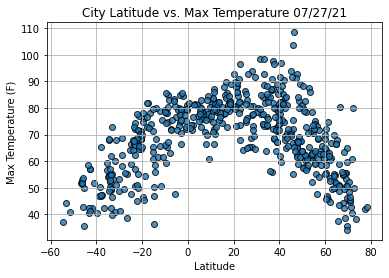

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

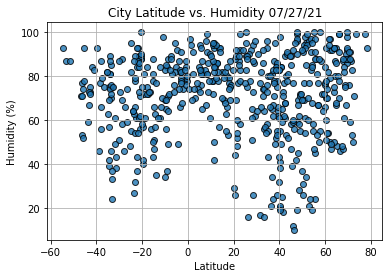

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()